## Predictive task - marketing

Aim of this task was to increase effectiveness of marketing campaign. In order to identity clients potentially interested in products, data from previous campaign has been analyzed. Furthermore data from control group has been used in order to find out what are the features of clients who have subscribed to product without beeing previously affected by campaign.

In further analysis open source Python packages like pandas, numpy, sklearn, matplotlib and seaborn have been used. Some additional options to improve transparency of code have been applied.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2020)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

Data has been loaded using pandas package. Transformation of target variable into numeric values has been performed.

In [2]:
df = pd.read_csv('bank_data_prediction_task.csv', index_col=0)
df['y'] = df['y'].map(lambda x: 1 if x=='yes' else 0) 

#### Main information about data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 22 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              16476 non-null object
month                16476 non-null object
day_of_week          16476 non-null object
duration             16476 non-null float64
campaign             16476 non-null float64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null object
emp.var.rate         41188 non-null float64
cons.price.idx       41075 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
y                    41188 

There are more than 41 000 records, some features concerns only campaign data. Data types are diversed.

In [4]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
28240,49,admin.,married,basic.9y,unknown,no,yes,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0,control group
10516,35,technician,married,university.degree,no,yes,no,cellular,nov,thu,92.0,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0,campaign group
36541,27,admin.,single,high.school,unknown,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0,control group
2160,49,services,married,high.school,unknown,yes,yes,telephone,may,fri,178.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group
9169,40,technician,divorced,professional.course,no,yes,no,cellular,aug,tue,109.0,8.0,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0,campaign group


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,16476.000000,16476.00000,41188.000000,41188.000000,41188.000000,41075.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,259.678866,2.57957,962.475454,0.172963,0.081886,93.576356,-40.502600,3.621291,5167.035911,0.100515
std,10.42125,263.942322,2.78453,186.910907,0.494901,1.570960,0.578342,4.628198,1.734447,72.251528,0.300689
min,17.00000,0.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,104.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,182.000000,2.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,320.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,43.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
1,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group
4,25,services,single,high.school,no,yes,no,telephone,may,mon,50.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group
5,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,campaign group


In [6]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
41184,64,retired,divorced,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,control group
41185,36,admin.,married,university.degree,no,no,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,control group
41186,29,unemployed,single,basic.4y,no,yes,no,NaN,NaN,NaN,NaN,NaN,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0,control group
41187,56,retired,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,control group
41188,74,retired,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0,control group


### EDA

Exploratory data analysis have been performed in order to better understand data, find interesting patterns and prepare appropriate models.

Distibution of target variable:

In [8]:
df['y'].value_counts()

0    37048
1     4140
Name: y, dtype: int64

In [9]:
df['y'].value_counts(normalize=True)

0    0.899485
1    0.100515
Name: y, dtype: float64

Data is imbalanced. Only about 10% of target variable is a success action - client subscribed to term deposit.

Histograms for numeric variables

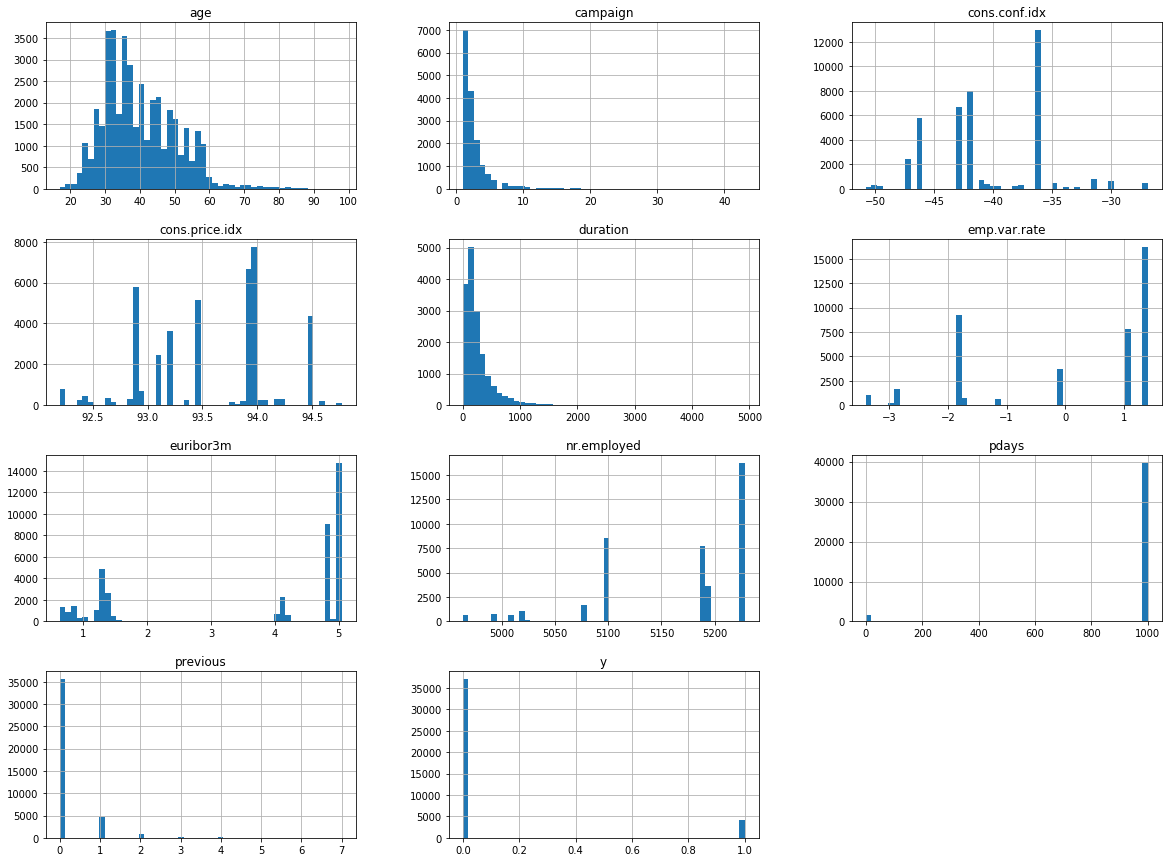

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Distributions of features are diversed. Some features like age tends to be normal, others like duration are skewed.

In [11]:
cat_feat = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome']

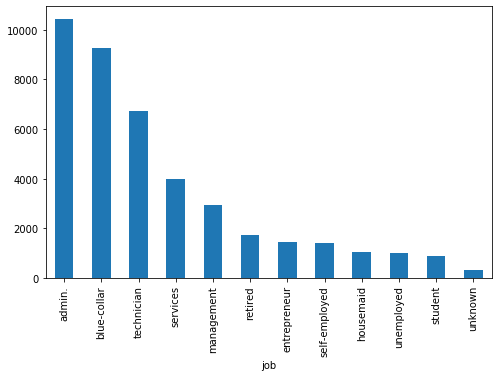

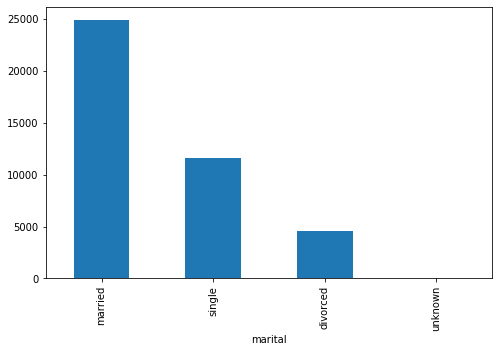

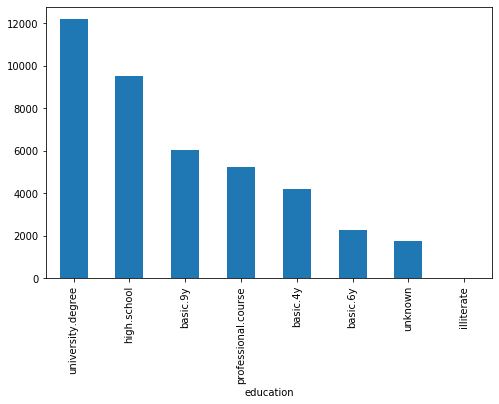

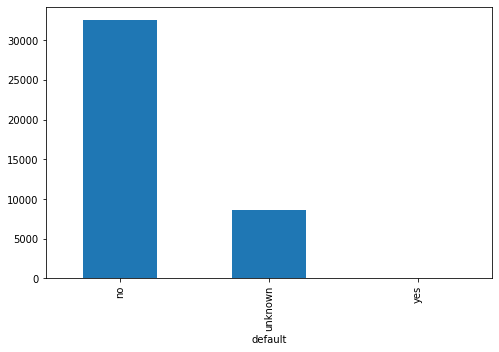

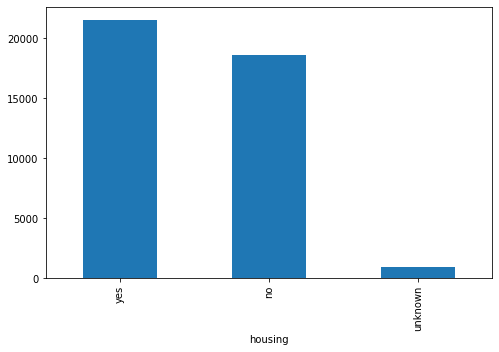

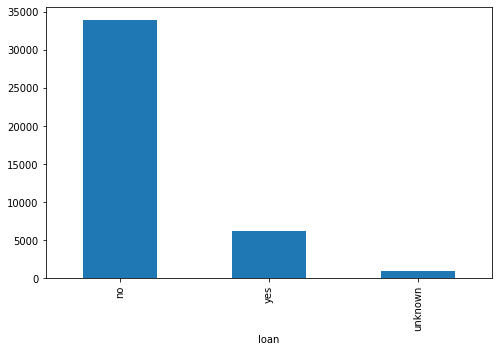

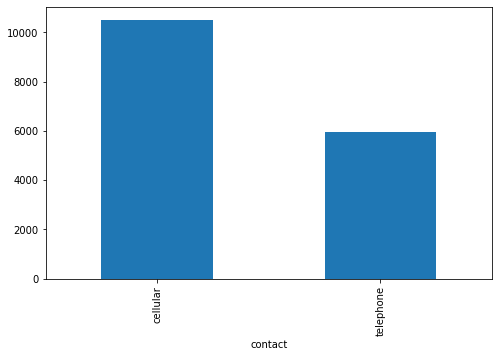

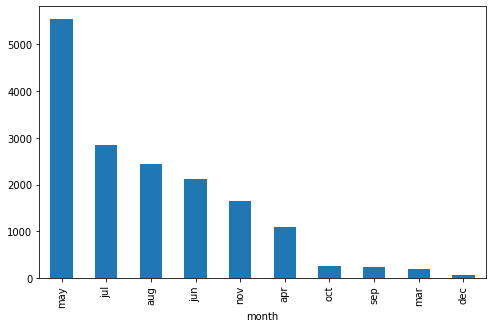

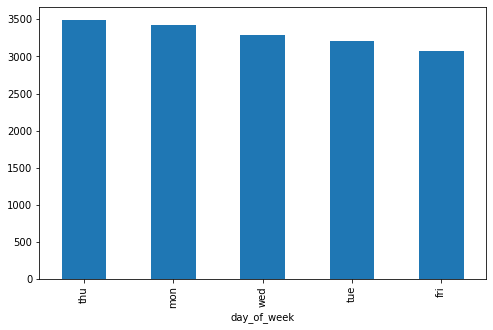

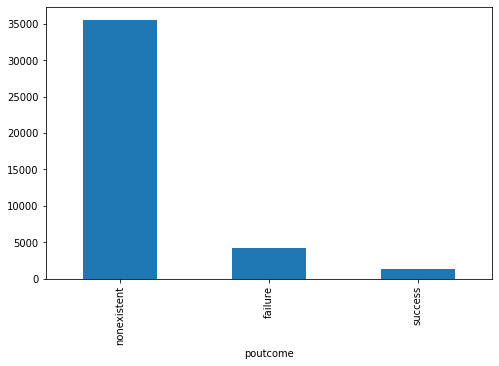

In [12]:
for f in cat_feat:
    plt.figure(figsize=(8, 5))
    df.groupby(f)['y'].agg('count').sort_values(ascending=False).plot(kind='bar')

In [14]:
for f in cat_feat:
    print('\t', f,'\n', df[f].value_counts(), '\n')

	 job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

	 marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

	 education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

	 default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

	 housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

	 loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

	 contact 
 cellular     

Distributions of values for each feature shows that some features don't give a lot of information. For example only three clients have credit in default, so it is rather not valuable information. However, there is a lot of features which looks like interesting: job, marital status, data concerning previous campaigns. In next part I've analyzed attributes to check impact on target variable.

#### Target variable in campaign group and control group

People from campaign group have taken part in campaign, while people from control group did not. How successful is campaign?

In [15]:
df.groupby(['test_control_flag','y'])['y'].agg('count')

test_control_flag  y
campaign group     0    14620
                   1     1856
control group      0    22428
                   1     2284
Name: y, dtype: int64

In [16]:
df_camp = df[df['test_control_flag']=='campaign group']
df_cont = df[df['test_control_flag']=='control group']

print(df_camp.shape,' ', df_cont.shape )

(16476, 22)   (24712, 22)


In [17]:
print('% of success in campaign set: {}%'.format(round(len(df_camp[df_camp['y']==1]['y'])*100
                                                  /df_camp.shape[0],2)))
print('% of success in control set: {}%'.format(round(len(df_cont[df_cont['y']==1]['y'])*100
                                                 /df_cont.shape[0],2)))

% of success in campaign set: 11.26%
% of success in control set: 9.24%


Percantage of subscribed is higher in group affected by campaign, what is of course something expected. What should be done is to better targetting people, not randomly but based on for example economic parametres, financial condition or behaviour in previous campaigns.

Some combinations of attributes have been verified in order to find important features. Data has been splitted into control and campaign group. Attributes have been analysed separately in each group due to fact that campaign has impact on client's behaviour.

Function to visualize data:

In [18]:
def plot_var(df, x, y, h=None, size=(15, 5)):
    plt.figure(figsize=size)
    sns.barplot(x=x, y=y, hue=h, data=df)
    plt.xticks(rotation=90)

##### JOB

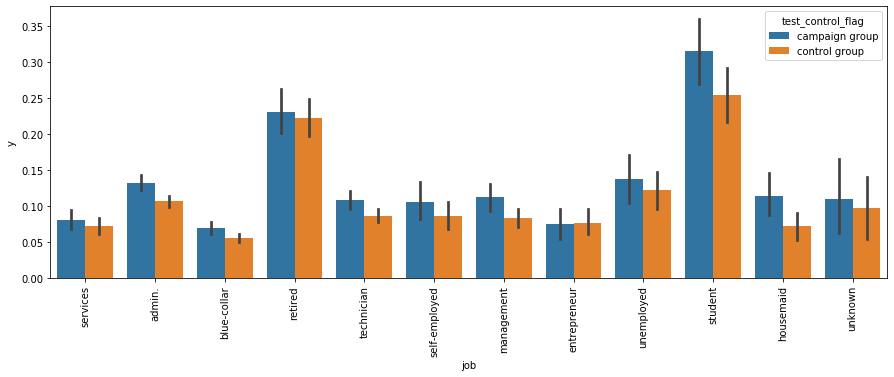

In [19]:
plot_var(df, x='job', y='y', h='test_control_flag')

There are categories potentially more interested in products: students and retired people.

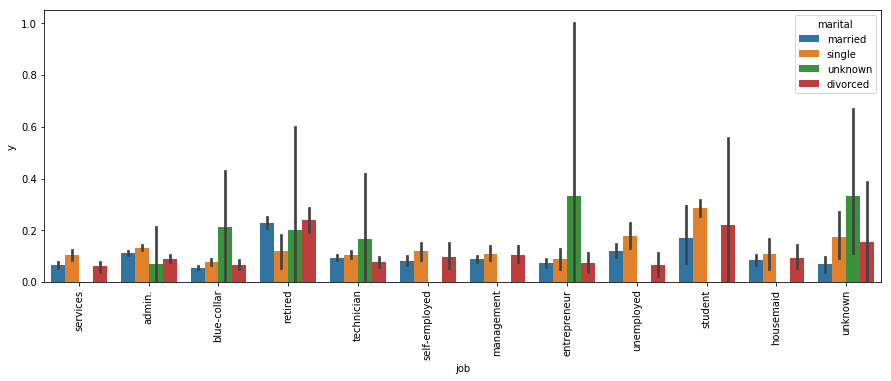

In [79]:
plot_var(df, x='job', y="y", h='marital')

Visualization of  job and martial status shows that single people are more likely to subscribe product, however difference is rather slight.

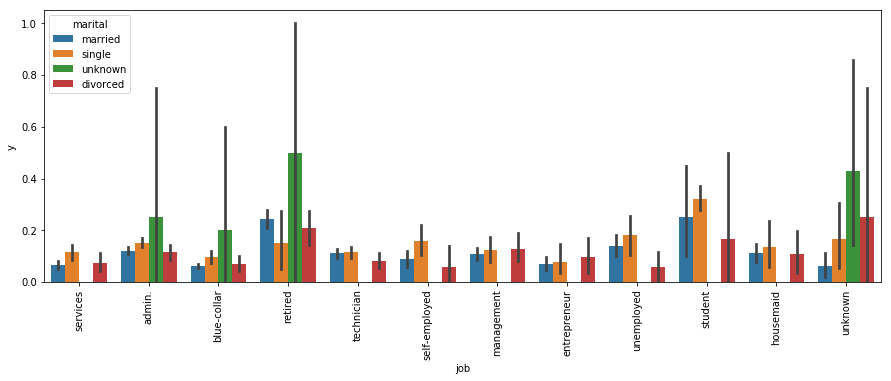

In [80]:
plot_var(df_camp, x='job', y="y", h='marital')

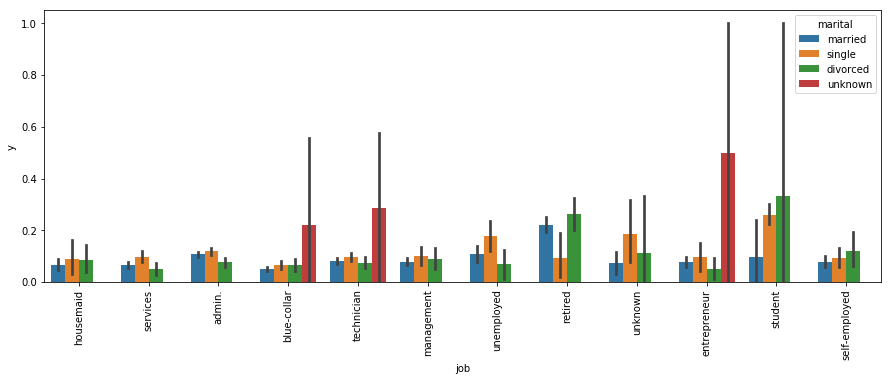

In [81]:
plot_var(df_cont, x='job', y="y", h='marital')

In case of this attribute distribution is similar in campaign and control group, however percent of subscribers is higher in campaign set.

##### Education

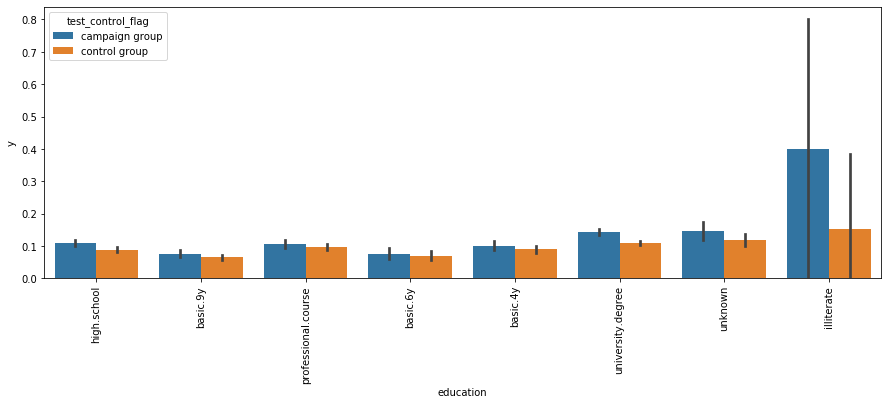

In [20]:
plot_var(df, x='education', y="y", h='test_control_flag')

In [187]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

There is rather no important trend, illiterate are more likely to subscribe, but there are only 18 people in this group. 

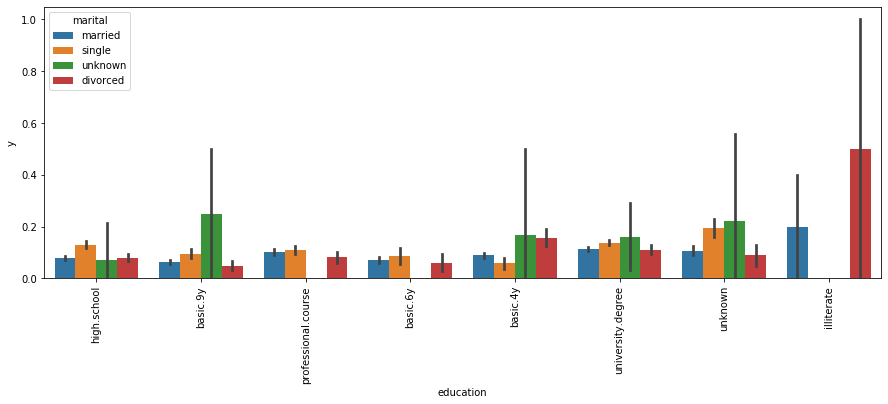

In [32]:
plot_var(df, x='education', y="y", h='marital')

##### Marital status

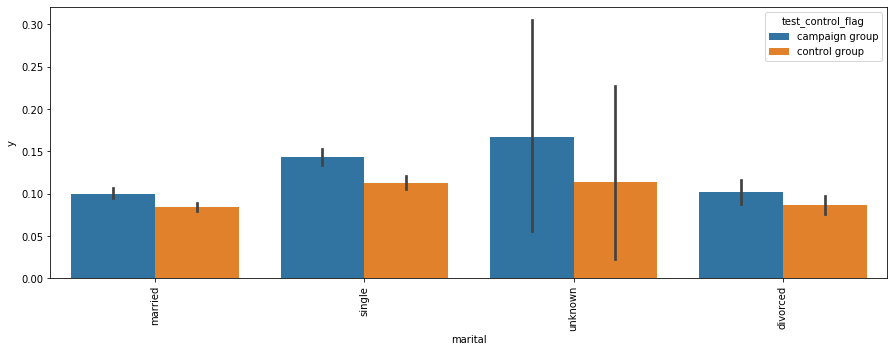

In [22]:
plot_var(df, x='marital', y="y", h='test_control_flag')

##### Housing loan

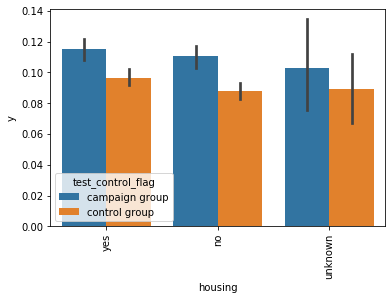

In [9]:
plot_var(df, x='housing', y='y', h='test_control_flag', size=(6,4))

##### Personal loan

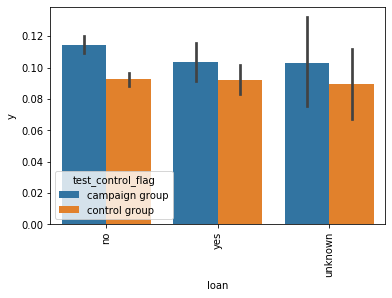

In [10]:
plot_var(df, x='loan', y='y', h='test_control_flag', size=(6,4))

##### Credit in default

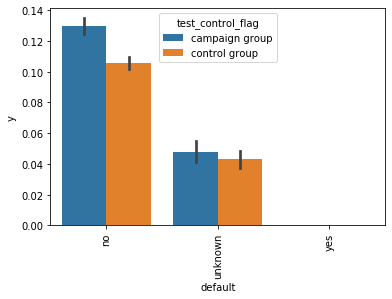

In [13]:
plot_var(df, x='default',y='y', h='test_control_flag', size=(6,4))

In [24]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

##### Age

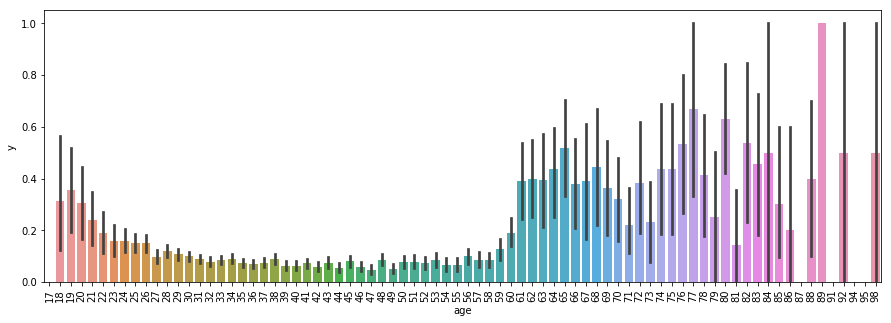

In [170]:
plot_var(df_cont, x='age', y="y")

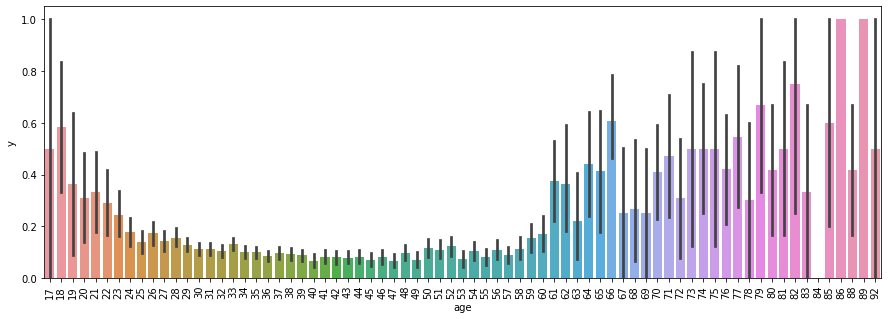

In [33]:
plot_var(df_camp, x='age', y="y")

Age seems to be important. In both groups people younger than 23 and older than 60 are more likely to choose product.

##### Euribor

Median of euribor for y=0:  4.857


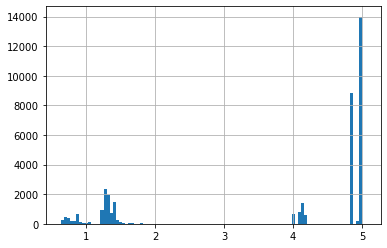

In [27]:
print('Median of euribor for y=0: ', df[df['y']==0]['euribor3m'].median())
df[df['y']==0]['euribor3m'].hist(bins=100);

Median of euribor for y=1:  1.266


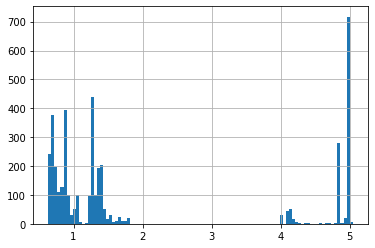

In [25]:
print('Median of euribor for y=1: ', df[df['y']==1]['euribor3m'].median())
df[df['y']==1]['euribor3m'].hist(bins=100);

Economic factors have impact on behaviour. When euribor is lower, people are more likely to subscribe. It should be taking into consideration in campaign planning.

##### Employment variation rate 

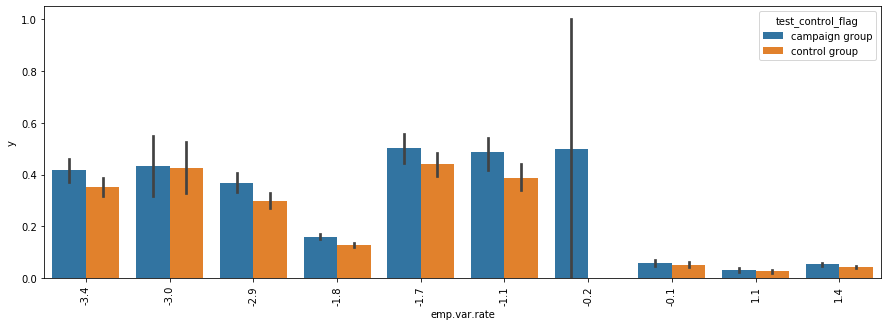

In [17]:
plot_var(df, x='emp.var.rate', y='y', h='test_control_flag')

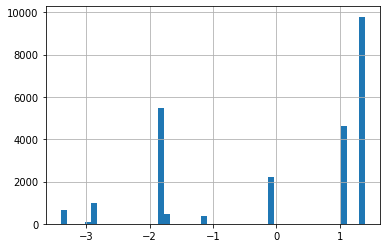

In [63]:
df_cont['emp.var.rate'].hist(bins=50);

When rate is negative, there is more subscribed clients.

##### Day of week

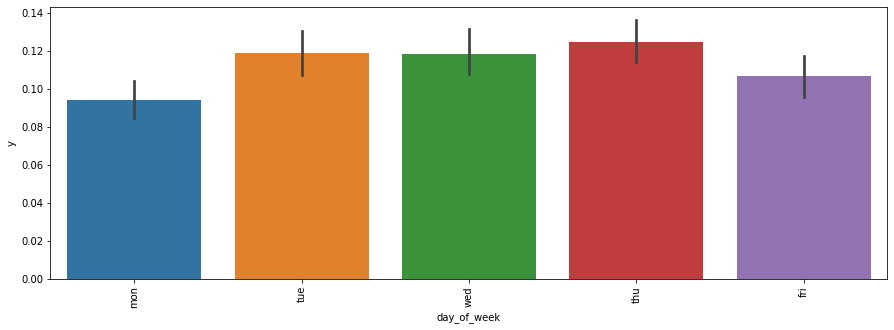

In [22]:
plot_var(df_camp, x='day_of_week', y="y")

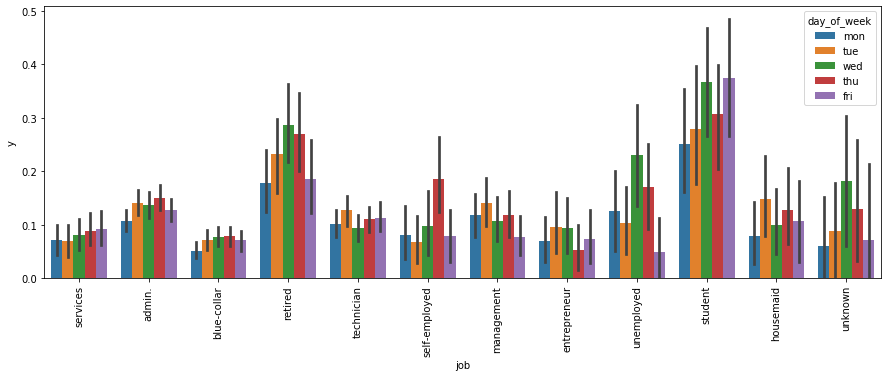

In [20]:
plot_var(df_camp, x='job', y="y", h='day_of_week')

##### Month

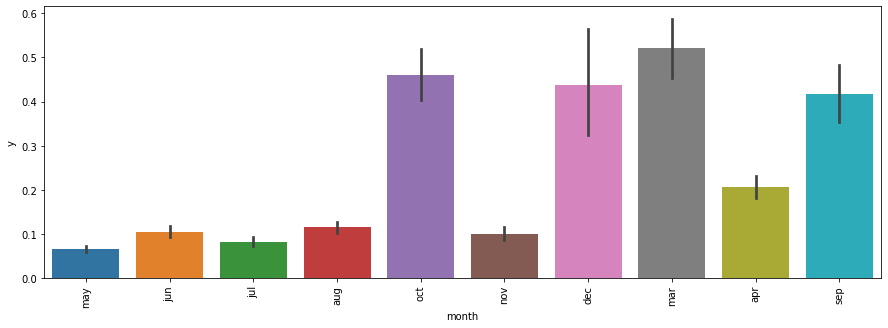

In [23]:
plot_var(df_camp, x='month', y="y")

In [26]:
df_camp['month'].value_counts()

may    5536
jul    2842
aug    2443
jun    2126
nov    1653
apr    1092
oct     270
sep     240
mar     203
dec      71
Name: month, dtype: int64

Effectiveness of campaign during holiday season is visibly smaller.

##### Contact communication type

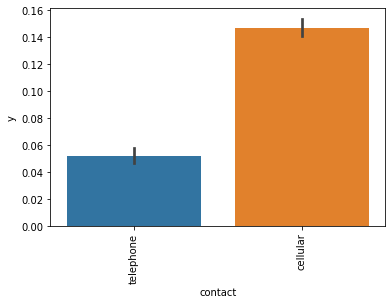

In [24]:
plot_var(df_camp, x='contact', y="y", size=(6,4))

In [25]:
df_camp['contact'].value_counts()

cellular     10505
telephone     5971
Name: contact, dtype: int64

##### Number of contacts performed before this campaign

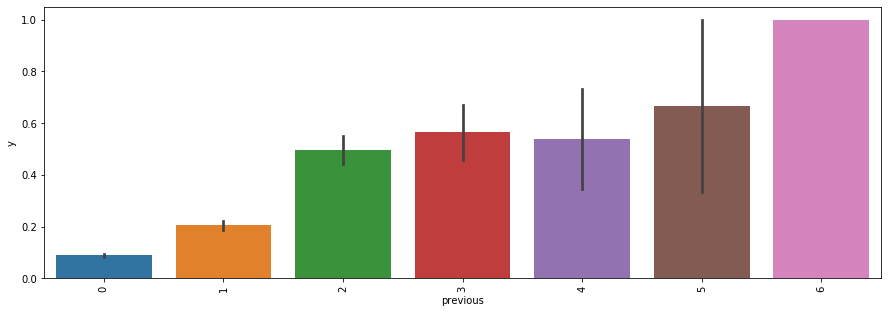

In [27]:
plot_var(df_camp, x='previous', y="y")

In [28]:
df_camp['previous'].value_counts()

0    14229
1     1819
2      306
3       85
4       26
5        9
6        2
Name: previous, dtype: int64

##### Total number of contacts performed during campaign

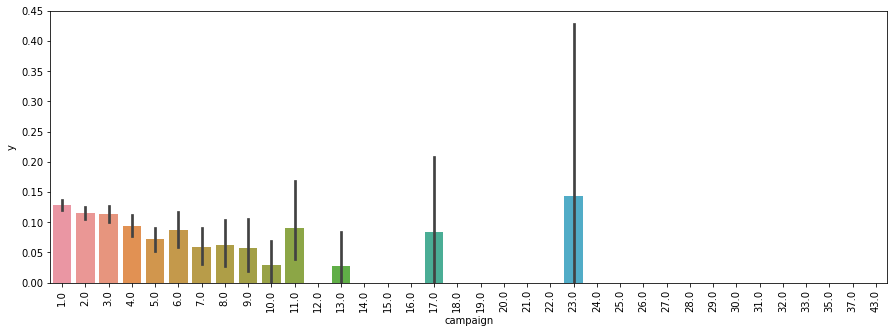

In [29]:
plot_var(df_camp, x='campaign', y="y");

In [30]:
df_camp['campaign'].value_counts()

1.0     6978
2.0     4299
3.0     2142
4.0     1043
5.0      659
6.0      392
7.0      257
8.0      145
9.0      105
10.0     102
11.0      77
12.0      45
13.0      36
14.0      26
15.0      25
17.0      24
16.0      16
18.0      14
20.0      13
21.0      12
22.0      10
24.0       7
19.0       7
23.0       7
28.0       5
25.0       4
27.0       4
29.0       4
26.0       3
32.0       3
33.0       3
43.0       2
35.0       2
30.0       2
31.0       2
37.0       1
Name: campaign, dtype: int64

In [31]:
len(df_camp[df_camp['campaign'] > 10]['campaign'])

354

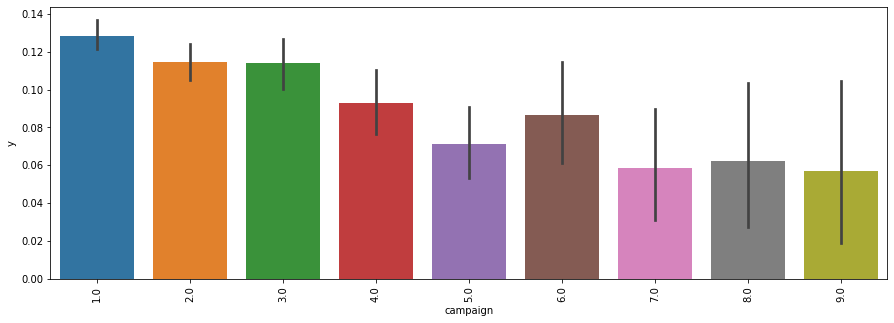

In [32]:
plot_var(df_camp[df_camp['campaign']<10], x='campaign', y="y")

With each contact, probability of decision to subscribe is seems to getting smaller.

##### Number of days that passed by after the client was last contacted from a previous campaign

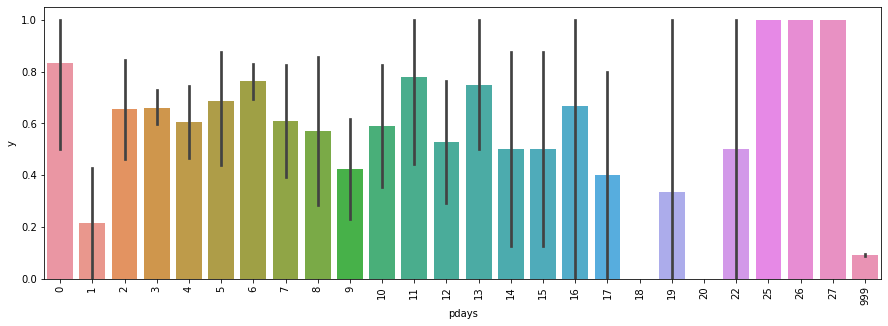

In [33]:
plot_var(df_camp, x='pdays', y="y");

##### Number of employees

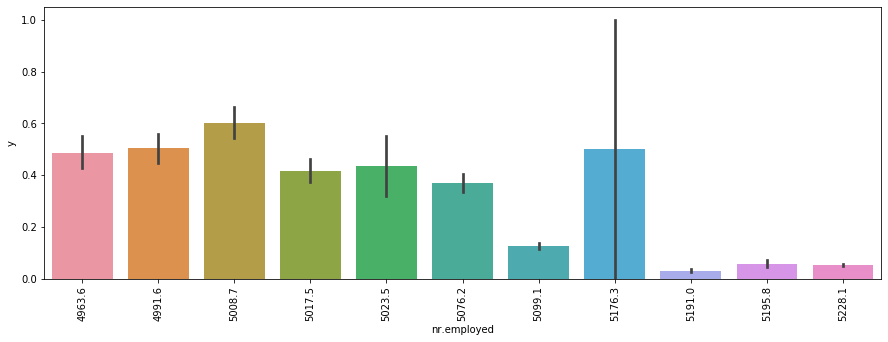

In [34]:
plot_var(df_camp, x='nr.employed', y="y");

In [35]:
df_camp['nr.employed'].value_counts()

5228.1    6440
5099.1    3461
5191.0    3114
5195.8    1479
5076.2     677
5017.5     429
4991.6     294
5008.7     256
4963.6     255
5023.5      69
5176.3       2
Name: nr.employed, dtype: int64

##### Outcome of the previous marketing campaign

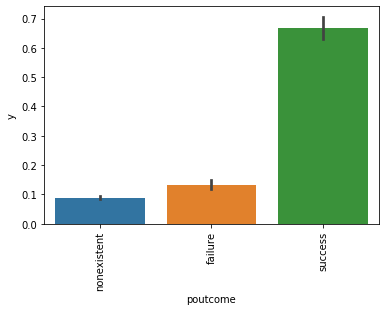

In [36]:
plot_var(df_camp, x='poutcome', y="y", size=(6,4));

In [37]:
df_camp['poutcome'].value_counts()

nonexistent    14229
failure         1695
success          552
Name: poutcome, dtype: int64

##### Last contact duration

Successful campaign duration median:  442.0


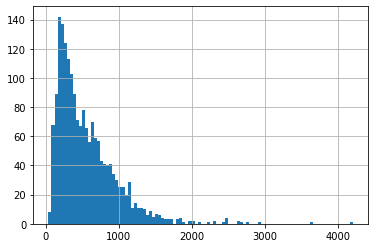

In [41]:
print('Successful campaign duration median: ',df_camp[df_camp['y']==1]['duration'].median())
df_camp[df_camp['y']==1]['duration'].hist(bins=100);

Non successful campaign duration median:  165.0


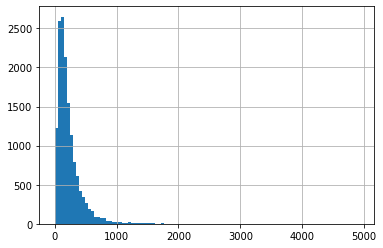

In [42]:
print('Non successful campaign duration median: ',df_camp[df_camp['y']==0]['duration'].median())
df_camp[df_camp['y']==0]['duration'].hist(bins=100);

This feature looks interesting, however it is connected with fact that when client is decided, contact lasts longer in order to inform about condition etc.

#### Proposition of solution

My approach consists of two models:
    - model #1 - concerns clients not previously affected by campaign
    - model #2 - concerns clients which already have been taken part in campaign
    
Final results for each client should be calculated as a difference between propabilities calculated by each model. If the difference will be higher than defined thrsehold, client will be qualified to campaign. 

I have decided to prepare two separate models because of such reasons as:
- for new clients there is no data from campaign so it seems reasonable to choose effectively based on economic, demographic parameters
- marketing campaign has undoubtedly impact on client's behaviour - client decides to subscribe because of convincing marketer or economic reasons or both of this, so it is rather different problem to target new clients and people about which we know more
- targeting campaign for "old" clients may needs more precision, for example we don't want to continuously spam people with calls and same offert
- it is not reasonable to target campaign to clients which nevertheless will subscribe to product, that's why it is important to find clients for which campaign will have biggest 

Construction and validation of models are presented in notebooks:
- <a href="./Predictive task marketing - model_1.ipynb">Predictive task marketing - model_1</a>
- <a href="./Predictive task marketing - model_2.ipynb">Predictive task marketing - model_2</a>

To do:
 - add more economic indicators
 - gather more data to train models
 - better hyperparameter optimalization
 - construct platform to gather and analyze campaign data